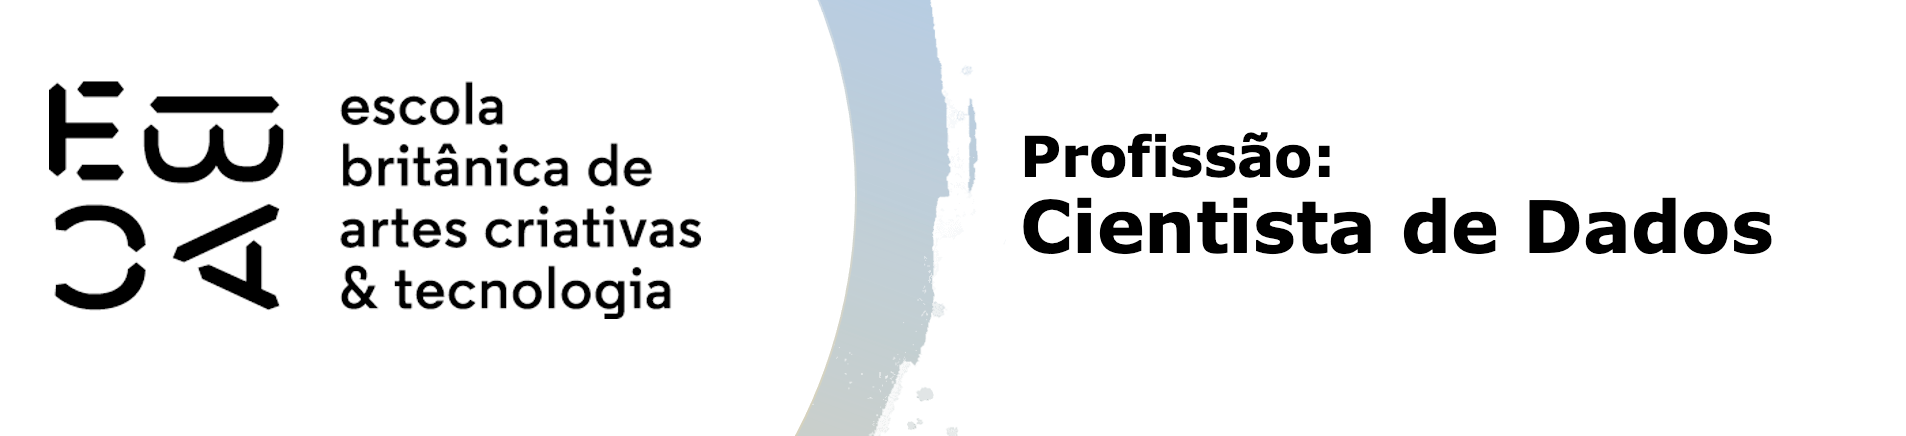

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('C:/Users/shinoki/Documents/data_science/tarefa_python/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
navegacao_cols = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration"
]

df[navegacao_cols].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


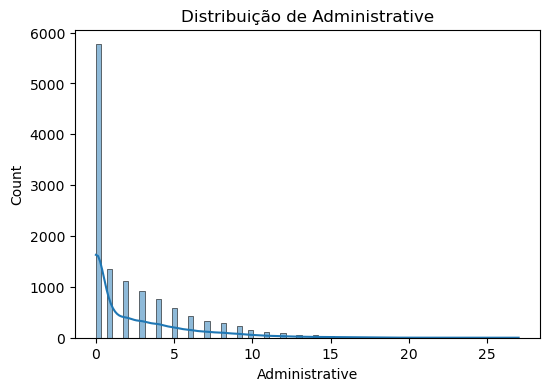

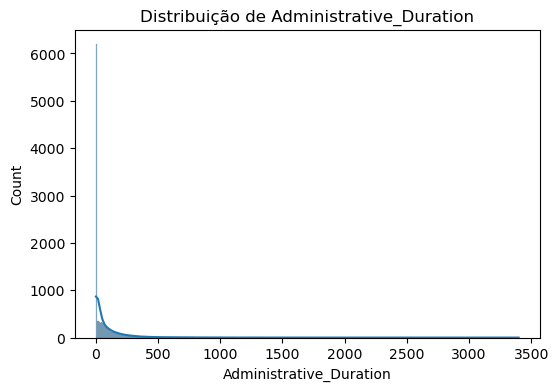

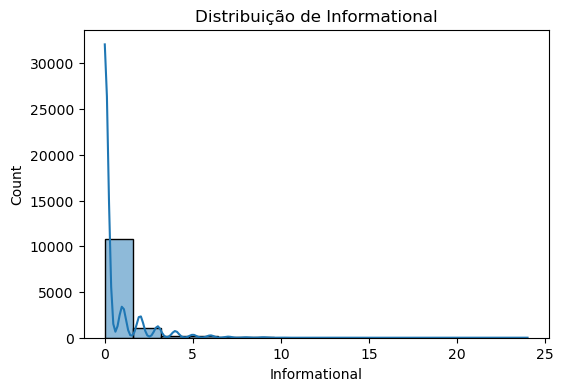

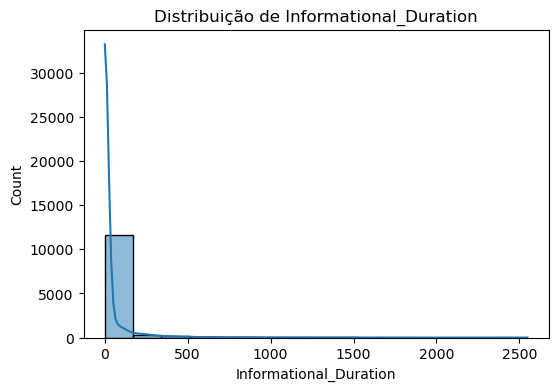

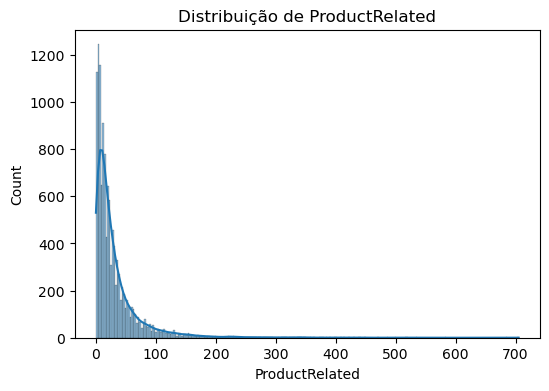

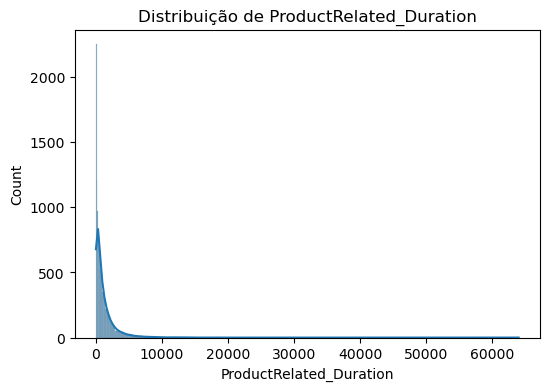

In [7]:
for col in navegacao_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

In [9]:
df[navegacao_cols].isnull().sum()
df.dropna(subset=navegacao_cols, inplace=True)

In [10]:
for col in ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]:
    df[f"log_{col}"] = np.log1p(df[col])


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

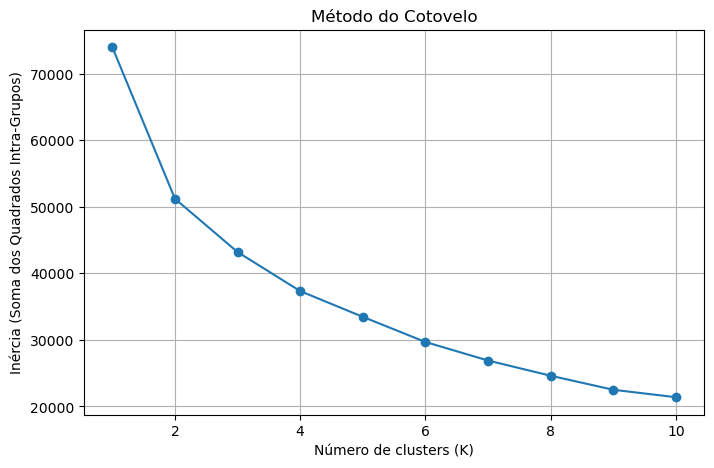

In [12]:
navegacao_cols = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration"
]

X = df[navegacao_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia (Soma dos Quadrados Intra-Grupos)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

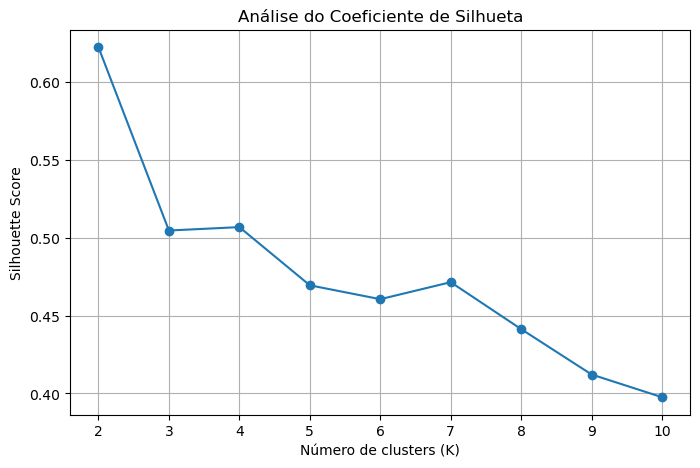

In [14]:
sil_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Análise do Coeficiente de Silhueta')
plt.grid(True)
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [ ]:
1. Coeficiente de Silhueta
O melhor Silhouette Score ocorre com 2 clusters (~0.63).

A partir daí, o score cai gradualmente com o aumento do número de clusters.

Isso sugere que 2 grupos têm maior coerência interna (os pontos estão mais próximos uns dos outros dentro do mesmo cluster).

2. Método do Cotovelo (Inércia)
O "cotovelo" no gráfico ocorre em 3 ou 4 clusters, onde a redução na inércia começa a diminuir o ritmo.

Isso indica que a partir de 4 clusters, adicionar mais clusters não traz tantos ganhos em termos de redução da variabilidade interna.

Soluções de Agrupamento a Serem Analisadas
Com base nesses gráficos, recomendo analisar os seguintes agrupamentos:

Agrupamento com 2 clusters
Prós: Alta coesão interna (maior Silhouette Score)

Contras: Pode ser genérico demais

Análise recomendada:

Ver média e mediana das 6 variáveis principais (navegação)

Ver tamanho de cada grupo

Tentar rotular os grupos, ex:

"Visitantes Casuais"

"Visitantes Interessados"

Agrupamento com 4 clusters
Prós: Equilíbrio entre coesão interna e granularidade

Contras: Menor Silhouette Score, mas maior detalhamento

Análise recomendada:

Ver perfil médio de cada cluster nas 6 variáveis

Pode surgir grupos como:

“Exploradores de Produto”

“Pesquisadores Informacionais”

“Admin Navegadores”

“Passageiros Rápidos”

Decisão Final (Sugestão)
Se o objetivo é entender perfis amplos de comportamento, use 2 grupos.

Se o objetivo é detalhar comportamentos e personalizar ações (ex: marketing), use 4 grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

In [24]:
df_cluster = df.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster.groupby('cluster')[['Revenue', 'BounceRates']].agg(['mean', 'count'])


Revenue        BounceRates       
             mean  count        mean  count
cluster                                    
0        0.251012   1976    0.007134   1976
1        0.338164    207    0.005940    207
2        0.132256  10147    0.025455  10147